<a href="https://colab.research.google.com/github/keithferns98/DeepLearning/blob/main/Dogs_Cats(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 34.1MB/s]
100% 542M/543M [00:06<00:00, 99.1MB/s]
100% 543M/543M [00:06<00:00, 87.5MB/s]
 98% 265M/271M [00:02<00:00, 116MB/s]
100% 271M/271M [00:02<00:00, 114MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile("test1.zip", 'r')
zip_ref.extractall("dogs-vs-cats")
zip_ref.close()

In [7]:
zip_ref = zipfile.ZipFile("train.zip", 'r')
zip_ref.extractall("dogs-vs-cats")
zip_ref.close()

In [8]:
!ls "dogs-vs-cats/train/"

cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.55

In [9]:
import os
base_dir = 'dogs-vs-cats'
train_dir = os.path.join(base_dir, 'train')
testing_dir = os.path.join(base_dir, 'test1')

In [10]:
train_dir,testing_dir

('dogs-vs-cats/train', 'dogs-vs-cats/test1')

dogs-vs-cats/train/cat.0.jpg
dogs-vs-cats/train/cat.1.jpg
dogs-vs-cats/train/cat.2.jpg
dogs-vs-cats/train/cat.3.jpg
dogs-vs-cats/train/cat.4.jpg
dogs-vs-cats/train/cat.5.jpg
dogs-vs-cats/train/cat.6.jpg
dogs-vs-cats/train/cat.7.jpg
dogs-vs-cats/train/cat.8.jpg


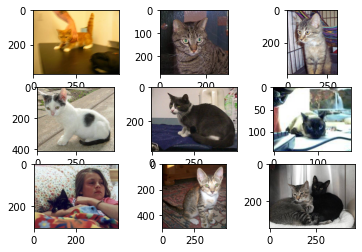

In [11]:
import matplotlib.pyplot as plt
folder=train_dir + '/'
for i in range(9):
    plt.subplot(330+1+i)
    file_name=folder + 'cat.' + str(i) + '.jpg'
    print(file_name)
    image=plt.imread(file_name)
    plt.imshow(image)
plt.show()


dogs-vs-cats/train/dog.0.jpg
dogs-vs-cats/train/dog.1.jpg
dogs-vs-cats/train/dog.2.jpg
dogs-vs-cats/train/dog.3.jpg
dogs-vs-cats/train/dog.4.jpg
dogs-vs-cats/train/dog.5.jpg
dogs-vs-cats/train/dog.6.jpg
dogs-vs-cats/train/dog.7.jpg
dogs-vs-cats/train/dog.8.jpg


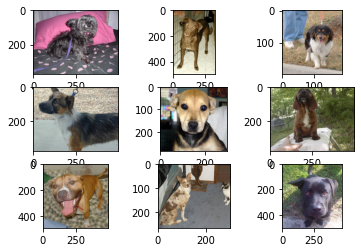

In [12]:
for i in range(9):
  plt.subplot(330+1+i)
  filename=folder + 'dog.' + str(i) + '.jpg'
  print(filename)
  img=plt.imread(filename)
  plt.imshow(img)
plt.show()

In [13]:
# train_file_list=os.listdir("dogs-vs-cats/train/")
# print('Number of images',train_file_list)

# dog_filenames=[fn for fn in train_file_list if fn.startswith('dog')]
# cat_filenames=[fn for fn in train_file_list if fn.startswith('cat')]

# dataset_filenames=train_test_split(dog_filenames,cat_filenames)

In [14]:
base_dir = 'dogs-vs-cats/'
train_dir = os.path.join(base_dir, 'train')
train_img_names = os.listdir(train_dir)

In [15]:
len(train_img_names)

25000

In [16]:
'ajkjd.lkdalj'.split('.')

['ajkjd', 'lkdalj']

In [17]:
import pandas as pd
categories=[]
for i in train_img_names:
    catrgories=i.split('.')[0]
    if catrgories=='dog':
      categories.append('dog')
    else:
      categories.append('cat')
df=pd.DataFrame({'Images':train_img_names,'Categories':categories})
df.head()

,Images,Categories
0,cat.3774.jpg,cat
1,cat.3654.jpg,cat
2,cat.2610.jpg,cat
3,cat.7763.jpg,cat
4,cat.11169.jpg,cat


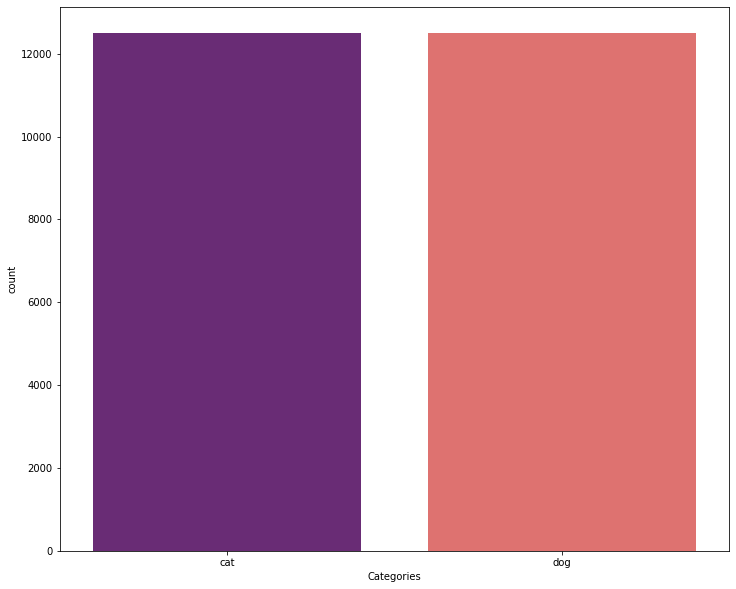

In [18]:
import seaborn as sns
import random

plt.figure(figsize=(12,10))
sns.countplot(data=df,x='Categories',palette='magma')

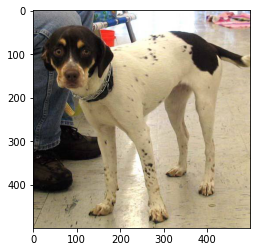

In [19]:
sample=random.choice(train_img_names)
plt.imshow(plt.imread('dogs-vs-cats/train/'+sample))

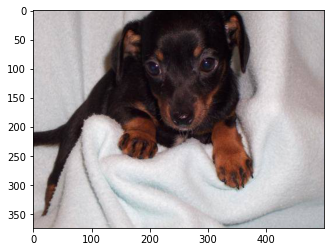

In [20]:
sample=random.choice(train_img_names)
plt.imshow(plt.imread('dogs-vs-cats/train/'+sample))

In [21]:
from sklearn.model_selection import train_test_split
train,validation=train_test_split(df,test_size=0.1)
train=train.reset_index(drop=True)
validation=validation.reset_index(drop=True)

In [22]:
train

,Images,Categories
0,dog.10297.jpg,dog
1,dog.2726.jpg,dog
2,cat.2757.jpg,cat
3,dog.6959.jpg,dog
4,dog.68.jpg,dog
...,...,...
22495,cat.3560.jpg,cat
22496,cat.3137.jpg,cat
22497,dog.11395.jpg,dog
22498,cat.6357.jpg,cat


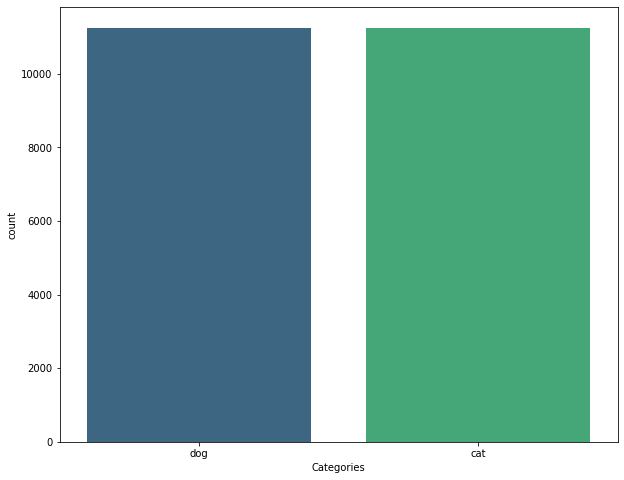

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(data=train,x='Categories',palette='viridis')

In [24]:
train['Categories'].value_counts()

dog    11257
cat    11243
Name: Categories, dtype: int64

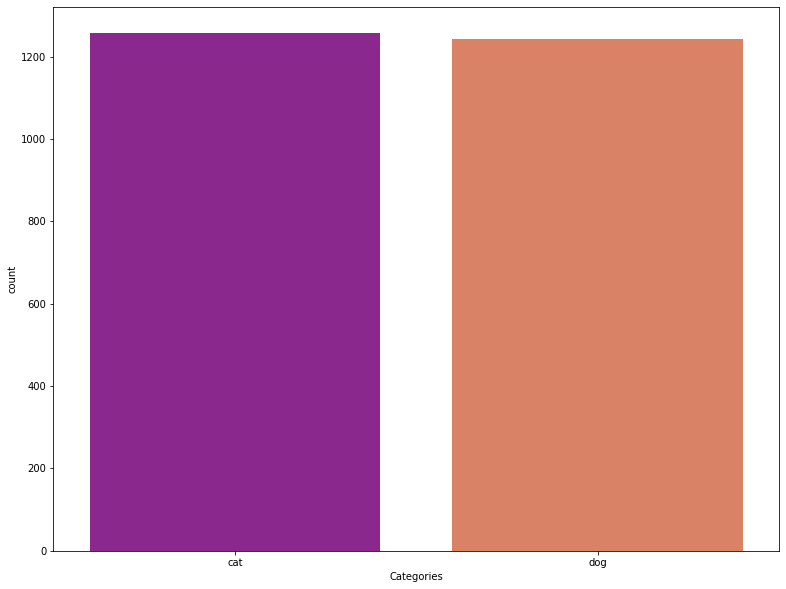

In [25]:
plt.figure(figsize=(13,10))
sns.countplot(data=validation, x="Categories",palette="plasma")

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_dataframe(train,
                                                  directory='./dogs-vs-cats/train',
                                                  x_col='Images',
                                                  y_col='Categories',
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))                                                  

Found 22500 validated image filenames belonging to 2 classes.


In [27]:
validation_datagen=ImageDataGenerator(rescale=1./255)

validation_generator=validation_datagen.flow_from_dataframe(validation,
                                                            directory='./dogs-vs-cats/train/',
                                                            x_col='Images',
                                                            y_col='Categories',
                                                            batch=20,
                                                            class_mode='binary',
                                                            target_size=(150,150)
                                                            )

Found 2500 validated image filenames belonging to 2 classes.


In [28]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 36, 36, 64)       

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
callback=EarlyStopping(monitor="val_loss",patience=4)
history=model.fit(train_generator,validation_data=validation_generator,epochs=20,callbacks=[callback])

Epoch 1/20
1125/1125 [==============================] - 120s 96ms/step - loss: 0.6887 - accuracy: 0.5632 - val_loss: 0.6164 - val_accuracy: 0.6648
Epoch 2/20
1125/1125 [==============================] - 105s 93ms/step - loss: 0.6042 - accuracy: 0.6673 - val_loss: 0.5554 - val_accuracy: 0.7044
Epoch 3/20
1125/1125 [==============================] - 108s 96ms/step - loss: 0.5101 - accuracy: 0.7479 - val_loss: 0.4186 - val_accuracy: 0.8120
Epoch 4/20
1125/1125 [==============================] - 107s 95ms/step - loss: 0.4322 - accuracy: 0.8022 - val_loss: 0.4160 - val_accuracy: 0.8040
Epoch 5/20
1125/1125 [==============================] - 107s 95ms/step - loss: 0.3682 - accuracy: 0.8350 - val_loss: 0.3598 - val_accuracy: 0.8420
Epoch 6/20
1125/1125 [==============================] - 107s 95ms/step - loss: 0.3032 - accuracy: 0.8697 - val_loss: 0.3830 - val_accuracy: 0.8324
Epoch 7/20
1125/1125 [==============================] - 107s 95ms/step - loss: 0.2147 - accuracy: 0.9127 - val_loss: 0

In [35]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.688747,0.563156,0.616374,0.6648
1,0.604222,0.667333,0.555355,0.7044
2,0.510134,0.747867,0.418647,0.8120
3,0.432234,0.802178,0.416002,0.8040
4,0.368232,0.835022,0.359808,0.8420
5,0.303240,0.869733,0.382964,0.8324
6,0.214703,0.912667,0.423717,0.8192
7,0.149613,0.943600,0.514005,0.8236
8,0.103236,0.961822,0.565874,0.8244


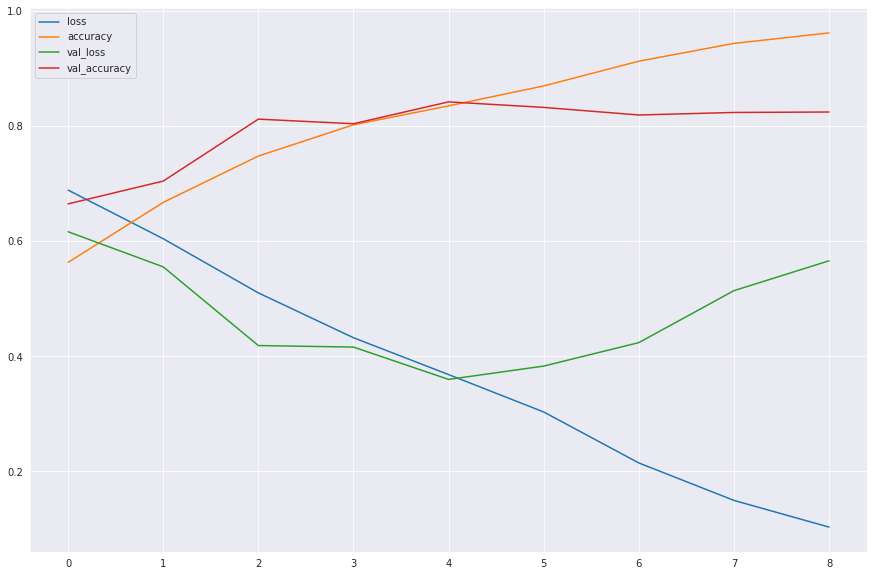

In [36]:
sns.set_style('darkgrid')
pd.DataFrame(model.history.history).plot(figsize=(15,10))

In [38]:
test_dir='dogs-vs-cats/test1/'
test_imgs=os.listdir(test_dir)

In [58]:
test_imgs[0]

'71.jpg'

In [40]:
test_df=pd.DataFrame({'Images':test_imgs})
test_df.head()

,Images
0,71.jpg
1,11648.jpg
2,1024.jpg
3,2739.jpg
4,5977.jpg


In [42]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_dataframe(test_df,
                                                directory='dogs-vs-cats/test1',
                                                x_col='Images',
                                                y_col=None,
                                                class_mode=None,
                                                target_size=(150,150),
                                                shuffle=True,
                                                batch_size=20)

Found 12500 validated image filenames.


In [48]:
import numpy as np
predictions=model.predict(test_generator,steps=np.ceil(12500/20))

In [49]:
predictions

array([[0.9498444 ],
       [0.02103305],
       [0.1537586 ],
       ...,
       [0.01773512],
       [0.02171601],
       [0.966604  ]], dtype=float32)

In [50]:
test_df['Catrgories']=pd.DataFrame(predictions)

In [51]:
test_df

,Images,Catrgories
0,71.jpg,0.949844
1,11648.jpg,0.021033
2,1024.jpg,0.153759
3,2739.jpg,0.651859
4,5977.jpg,0.039314
...,...,...
12495,10414.jpg,0.025433
12496,9422.jpg,0.676664
12497,6575.jpg,0.017735
12498,8821.jpg,0.021716


In [54]:
def label(category):
  if category>0.5:
    return 1
  else :
    return 0

In [55]:
test_df['Categories']=test_df['Catrgories'].apply(label)
test_df

,Images,Catrgories,Categories
0,71.jpg,0.949844,1
1,11648.jpg,0.021033,0
2,1024.jpg,0.153759,0
3,2739.jpg,0.651859,1
4,5977.jpg,0.039314,0
...,...,...,...
12495,10414.jpg,0.025433,0
12496,9422.jpg,0.676664,1
12497,6575.jpg,0.017735,0
12498,8821.jpg,0.021716,0


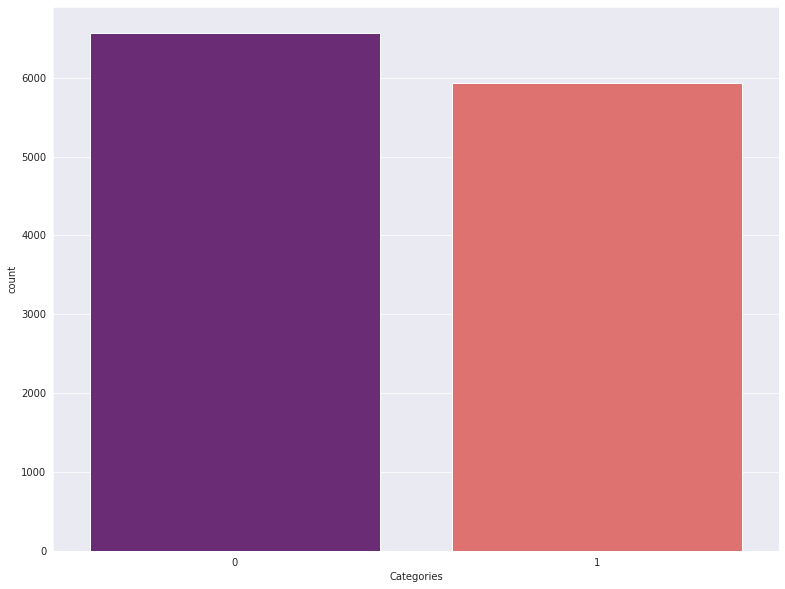

In [57]:
plt.figure(figsize=(13,10))
sns.countplot(data=test_df, x="Categories",palette="magma")

0    1
1    0
2    0
3    1
4    0
5    0
6    1
7    1
8    0
9    1
Name: Categories, dtype: int64


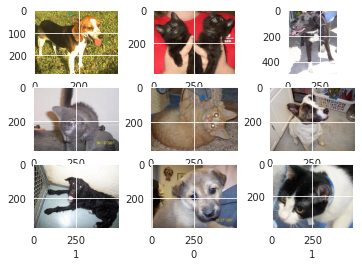

In [74]:
for i in range(1,10):
  plt.subplot(330+0+i,)
  plt.imshow(plt.imread('dogs-vs-cats/test1/'+test_imgs[i]))
  plt.xlabel(test_df['Categories'][i])
print(test_df['Categories'][:10])